# 🐶 End to End Multi class Dog Breed Identification

## 1. Problem 
Identifing the breed of a dog given an image of a dog.

## 2. Data 
from kaggle,
data :- https://www.kaggle.com/c dog-breed-identification

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dod breed of each test image 
https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation


## 4. Fautures 
Some information about the data:
* We are dealing with images (unstructured data ) so it's probably best we use deep learning/transfer learning.
* There  are 120 breeds of dogs (this means there are 120 differnt cases).
* There are more than 10,000+ images in training set
* There are around 10,000+ images in the test set (these images have no labels, because, it will be predicted)

# Get our workspace ready
* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we're using a GPU

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing nessasary tools
import tensorflow_hub as hub
import tensorflow as tf
print("TF version : ", tf.__version__)
print("TF Hub version : ", hub.__version__)

# Checking for GPU avaiability - meaning superfast numeric computing
print("GPU", "avilable " if tf.config.list_physical_devices("GPU") else "not available") 


TF version :  2.13.0
TF Hub version :  0.14.0
GPU avilable 


## Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numeric format. So thats turning images to Tensors (numeric representation )

Let's start by checking labels 

In [5]:
# Checkout the labels of data
import pandas as pd
labels_csv = pd.read_csv("/kaggle/input/dog-breed-identification/labels.csv")
print(labels_csv.head())
print(labels_csv.describe())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [6]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
type(labels_csv)

pandas.core.frame.DataFrame

<Axes: xlabel='breed'>

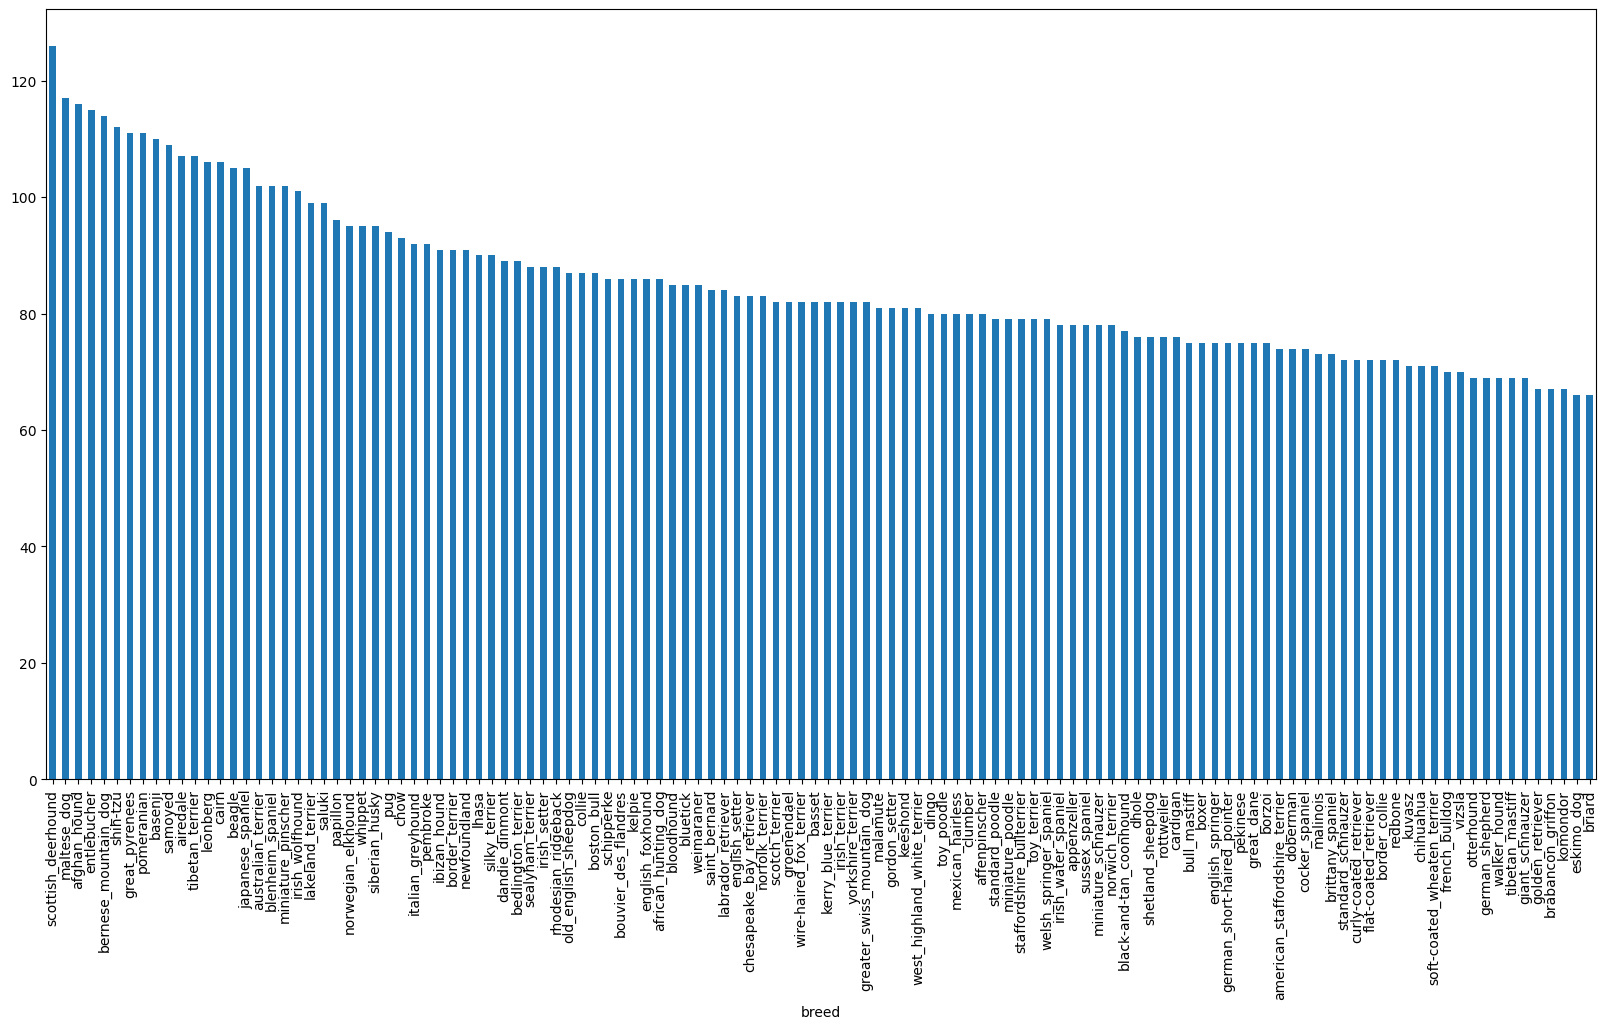

In [8]:
 # How many images are there of each breed?
 labels_csv["breed"].value_counts().plot(kind='bar',figsize=(20, 10))

In [9]:
labels_csv["breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

In [10]:
labels_csv["breed"].value_counts().median()

82.0

In [11]:
# Let's view an image
from IPython.display import Image
Image("drive/My Drive/Colab_Dog Vision data/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

FileNotFoundError: No such file or directory: 'drive/My Drive/Colab_Dog Vision data/train/000bec180eb18c7604dcecc8fe0dba07.jpg'

FileNotFoundError: No such file or directory: 'drive/My Drive/Colab_Dog Vision data/train/000bec180eb18c7604dcecc8fe0dba07.jpg'

<IPython.core.display.Image object>

### Geting images and their labels

Let's get a list of all of our image file pathname.

In [12]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [13]:
# Create pathname from ID's
filenames = [fname for fname in labels_csv["id"]]

# Create pathname from image ID's
filenames = ["/kaggle/input/dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:5]


['/kaggle/input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/kaggle/input/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/kaggle/input/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/kaggle/input/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/kaggle/input/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [14]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("/kaggle/input/dog-breed-identification/train")) == len(filenames):
  print("Filenames maths actual amount of data!!! Proceed")
else: 
  print("Filenames do not match actual amount of files, check the target directory")

Filenames maths actual amount of data!!! Proceed


In [15]:
filenames[9000]

'/kaggle/input/dog-breed-identification/train/e20e32bf114141e20a1af854ca4d0ecc.jpg'

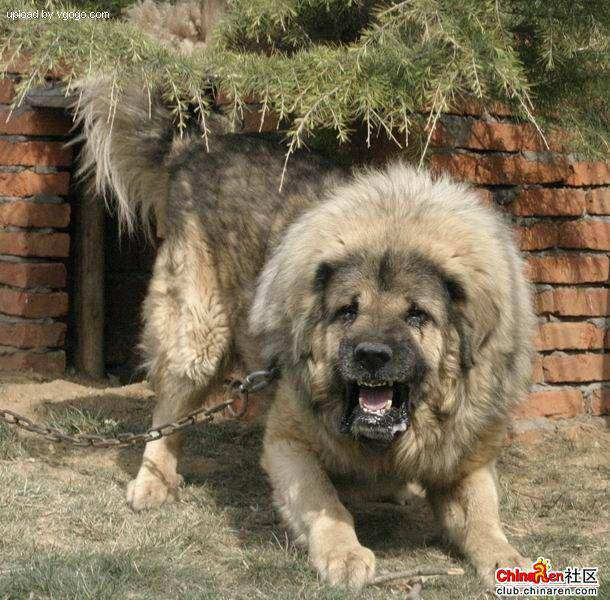

In [16]:
# One more check 
Image(filenames[9000])

In [17]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Preparing labels

In [18]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [19]:
len(labels)

10222

In [20]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of filenames matches number of labels")
else:
  print("Number of filenames do not match number of labels, check directories")

Number of filenames matches number of labels


In [21]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [22]:
# Turn a single label into a array of booleans
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [23]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]

boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [24]:
len(boolean_labels), len(labels)

(10222, 10222)

In [25]:
# Example : Turning boolean array into integers
print(labels[0]) # Orignal breeds
print(np.where(unique_breeds == labels[0])) # index where label ocurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [26]:
filenames[:5]

['/kaggle/input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/kaggle/input/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/kaggle/input/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/kaggle/input/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/kaggle/input/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

## Creating validation set


In [27]:
# Setup X, y variables
X = filenames
y = boolean_labels

In [28]:
len(filenames)

10222

### Experimenting with ~1000 images

In [29]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type : "slider", min:1000, max:10000, step:1000}

In [30]:
# Spliting data into training and validation set
from sklearn.model_selection import train_test_split

# Spliting data into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                    y[:NUM_IMAGES],
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [31]:
X_train[:2], y_train[:2]

(['/kaggle/input/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/kaggle/input/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, Fal

## Preprocessign Images (turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does few things
1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a vaiable, image
3. Turn our imafe (a jpg) into Tensors
4. Normalize image (convert color channel values from 0-255 to 0-1 )
5. Resize the image to be shape of (224, 224)
6. Return the modified image

In [32]:
# Convert a image to Nimpy arrray
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [33]:
image.shape

(257, 350, 3)

In [34]:
image.min(), image.max()

(0, 255)

In [35]:
# Turning image into a tensor
tf.constant(image)[:2].shape

TensorShape([2, 350, 3])

Making function 
1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a vaiable, image
3. Turn our imafe (a jpg) into Tensors
4. Normalize image (convert color channel values from 0-255 to 0-1 )
5. Resize the image to be shape of (224, 224)
6. Return the modified image

In [36]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  """
  Take an image file and turns the image into a Tensor
  """
  # Read in an imafe file
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical Tensor with 3 color chennels (Red, Gree, Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize image to desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [37]:
tensor = tf.io.read_file(filenames[26])
# tensor

In [38]:
tensor = tf.image.decode_jpeg(tensor, channels=3)[:2]

In [39]:
tf.image.convert_image_dtype(tensor, tf.float32).shape

TensorShape([2, 375, 3])

## Turning our data into batches

If we try to process 10000+ images in one go, they might not fit into meaning

Using 32 images at a time
 
To use tensor effectively, data should be in form of Tensor tuples which looks like this `(image, label)`



In [40]:
# Create a function to return a tuple of (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  process the image and return a typle of (image, label)
  
  """
  image = process_image(image_path)
  return image, label

In [41]:
# Try above function 
process_image(X[42]).shape, tf.constant(y[42]).shape

(TensorShape([224, 224, 3]), TensorShape([120]))

Now we've got a way to turn data into tuples into Tensors in the form: `(image, label)`
, let's make a function to turn all of our data (`X` & `Y`) into batches !

In [42]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Creates batches of data out of image (X) and label (Y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it it's validation data
  Also accepts test data as input (no labels) 
  """
  # If the data is a test datasets, no labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("creating validation data batches.....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths 
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnammes and labels before mapping image precessor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  
  return data_batch


In [43]:
# Creating training and validating data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)


Creating training data batches...
creating validation data batches.....


In [44]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [45]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """
  # Set the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows , 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [46]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [47]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [48]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

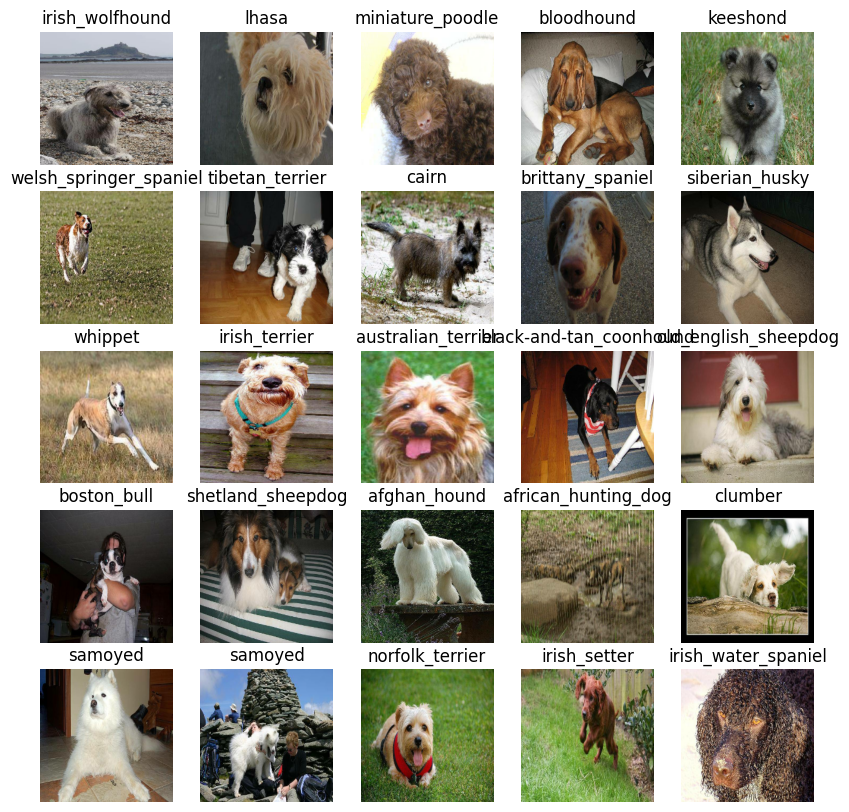

In [49]:
# Visualising data in training batches
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

In [50]:

# # Visualising data in training batches
# val_images, val_labels = next(val_data.as_numpy_iterator())
# show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there are a few things we need to define:
* The input shape ( our images shape, in the form of Tensors ) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use 

In [51]:
IMG_SIZE

224

In [52]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# setup model URL from TensorFlow Hub
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

Now we've got our inputs, outputs and model ready to go.
Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which :
* Takes the input shape, output shape and the model as parameter
* Defines the layers in a Keras model in sequential fashion( do this first, then this, then that)
* Compiles the model (says it should be evaluated and imporoved)
* Builds the model( tells the model the input shape it'll be getting).
* Return the model



In [53]:
# Create a function which builds a Keras model 
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Buuilding model with: ", MODEL_URL)

  # Setup the model alayers 
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") # Layer 2 (output layer)
  ])

  # Compiler the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [54]:
model = create_model()
model.summary()

Buuilding model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [55]:
 outputs = np.ones(shape=(1, 1, 1280))
 outputs, outputs.shape

(array([[[1., 1., 1., ..., 1., 1., 1.]]]), (1, 1, 1280))

 ## Creating callbacks 
 Callbacks are helper functions a model can use during traning to do such things as save its progress, check its progress or stops traning early if model stops improving

 We'll create two callbacks, one for TensorBord which helps track our models progress and another for early which prevents model from training for too long

 ### TensorBord Callback
 To setup a TensorBoard callback, we need to do 3 things:
 1. Load the TensorBord notebook extension
 2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function
 3. Visualise our models training logs with the `%tensorbord` modmagic funciton (we'll do this after model training). 

In [56]:
# Load TensorBord notebook extension
%load_ext tensorboard

In [63]:
import datetime

# Create a function to build a TensorBord callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBord logs
  logdir = os.path.join("/kaggle/working/drive/My Drive/Colab_Dog Vision data/logs",
                        # Make it so the logs get tracked whenever we run as experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
                        )
  return tf.keras.callbacks.TensorBoard(logdir)

## Early stoping callbacks '
Early stopping helps stop our model from overfitting by stopping training if a certain evaluation matric stop imporving 

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping



In [64]:
# creat early stoping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a moel ( on subset of data )

First model is only going to train on 1000 images, to make sure everyting is working and to minimise time between training 

In [65]:
NUM_EPOCHS = 50 #@param {type:"slider", min:10, max:100, step:10}

In [66]:
# Making sure we're still runing on a GPU
print("GPU available" if tf.config.list_physical_devices("GPU") else "not running on GPU :)")

GPU available


Creating a  funciton which trains a model

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, training data, validating data, number of epochs to train for (`NUM_EPCHOS`) and the callbacks we'de like to use
* Return the model

In [67]:
# Build a funciton to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create a new TensorBord session everything we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created 
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])
  # Returning the fitted model
  return model

In [68]:
# Fit the model to the data
model = train_model()

Buuilding model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/50
25/25 [==============================] - 6s 71ms/step - loss: 4.4894 - accuracy: 0.1000 - val_loss: 3.3556 - val_accuracy: 0.2950
Epoch 2/50
25/25 [==============================] - 1s 46ms/step - loss: 1.5783 - accuracy: 0.7038 - val_loss: 2.1467 - val_accuracy: 0.5450
Epoch 3/50
25/25 [==============================] - 1s 46ms/step - loss: 0.5455 - accuracy: 0.9413 - val_loss: 1.6939 - val_accuracy: 0.6100
Epoch 4/50
25/25 [==============================] - 1s 48ms/step - loss: 0.2503 - accuracy: 0.9850 - val_loss: 1.5366 - val_accuracy: 0.6250
Epoch 5/50
25/25 [==============================] - 1s 46ms/step - loss: 0.1463 - accuracy: 0.9962 - val_loss: 1.4488 - val_accuracy: 0.6400
Epoch 6/50
25/25 [==============================] - 1s 46ms/step - loss: 0.1002 - accuracy: 1.0000 - val_loss: 1.4166 - val_accuracy: 0.6250
Epoch 7/50
25/25 [==============================] - 1s 46ms

It looks like model is overfitting because it's performing far better on traning data than the valdation dataset, look for ways to prevernt overfitting in deep learning neural network

** Note ** overfitting to begin whith meaning model is learning something!!!

### Checking the TensorBord logs

The TensorBord magic function (`%tensorboard`) will access the logs directory we created and visualise it's content

In [75]:
# %pip uninstall -y tensorboard tb-nightly &&
# %pip install tb-nightly  # must have at least tb-nightly==2.5.0a20210316

In [77]:
# tensorboard --logdir /path/to/logs --load_fast true

In [78]:
%tensorboard --logdir /kaggle/working/drive/My\ Drive/Colab_Dog\ Vision\ data/logs --load_fast true

Reusing TensorBoard on port 6006 (pid 584), started 0:00:06 ago. (Use '!kill 584' to kill it.)

## Making and evaluating predictions using a trained model

In [79]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [80]:
# Make prediction on validation data
predictions = model.predict(val_data, verbose = 1)
predictions.shape

7/7 [==============================] - 1s 38ms/step


(200, 120)

In [81]:
predictions.shape

(200, 120)

In [82]:
len(y_val)

200

In [83]:
predictions[0], predictions.shape

(array([2.65590823e-03, 3.83331528e-04, 1.32449483e-03, 1.13418582e-03,
        3.26257141e-04, 6.19656494e-05, 8.91708210e-02, 9.65534709e-05,
        2.32380073e-04, 6.34707336e-04, 1.21766166e-03, 1.16557276e-04,
        6.92109286e-04, 1.16191251e-04, 5.72715944e-05, 3.96208750e-04,
        7.19606669e-06, 3.22379887e-01, 1.16098978e-04, 7.76494344e-05,
        3.34900746e-04, 9.11089766e-04, 1.28948624e-04, 5.45221800e-03,
        9.75113144e-05, 3.45300708e-04, 1.08312331e-01, 5.30530058e-04,
        4.24444879e-04, 7.36203510e-04, 3.83587292e-04, 3.07470793e-03,
        2.67955067e-04, 5.83518820e-04, 7.10586377e-04, 4.97145727e-02,
        5.08867961e-05, 5.55294915e-04, 4.78915645e-05, 8.69259238e-05,
        3.25421570e-03, 9.90854387e-05, 1.37445786e-05, 2.26054763e-04,
        1.11755426e-05, 2.88303505e-04, 8.21802096e-05, 1.37530500e-04,
        8.30268604e-04, 5.90189418e-04, 3.62198625e-04, 4.76337518e-05,
        7.24781887e-04, 1.71343127e-04, 1.82707008e-04, 2.819808

In [84]:
np.sum(predictions[0])

1.0

In [85]:
np.max(predictions[0])

0.3223799

In [86]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (propbabitity of predictions): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}, with value {predictions[index][np.argmax(predictions[index])]}")
print(f"Predicted label : {unique_breeds[np.argmax(predictions[index])]}")

[7.38451199e-05 8.64228205e-05 3.58237776e-05 2.68234144e-04
 2.94515700e-03 2.97308201e-04 4.38010524e-04 8.86791153e-04
 5.71052870e-03 2.63241287e-02 2.85375445e-05 5.62954810e-05
 7.72557454e-04 1.81178190e-03 2.34255474e-03 8.08859535e-04
 6.31446528e-05 7.64432189e-05 2.36816035e-04 4.86921170e-04
 2.33615719e-06 9.39185120e-05 2.39066485e-05 4.32341876e-05
 3.30315670e-03 1.18603430e-05 2.16163426e-05 1.46141843e-04
 2.86836177e-04 8.51107252e-05 9.39483361e-05 1.40892284e-04
 6.63023093e-05 3.24801294e-05 1.43562662e-04 2.47544376e-05
 1.36909817e-04 1.98889393e-04 5.65564151e-05 5.54811478e-01
 1.44269768e-04 8.60086730e-05 4.10499983e-03 1.68434472e-05
 2.65574345e-04 5.47788441e-05 3.48842790e-04 3.70977679e-04
 2.21944338e-05 2.42328082e-04 1.83500568e-04 1.94135908e-04
 1.21171084e-04 8.16766929e-04 2.32127441e-05 2.81426706e-04
 2.28904362e-04 2.92623663e-05 9.93910478e-04 4.51909291e-05
 1.38175092e-04 2.52568978e-04 4.68680309e-06 5.49564866e-05
 1.30445304e-04 2.976364

In [87]:
unique_breeds[113]

'walker_hound'

 Having the above functinalities is great but we want to do it at scale.

 And it would be even better if we could see the image the prediciton is being mode on!

 **Node:** Predictions probabilities are also known as confidence levels

In [88]:
# Turn prediction probabilities into their respective label (easier to understand )
def get_pred_label(predictions_probabilities):
  """
  Turns an array of prediction probabilities into a label
  """
  return unique_breeds[np.argmax(predictions_probabilities)]

# Get a predicted label based on an array of prediction probability
pred_label = get_pred_label(predictions[81])
pred_label

'golden_retriever'

Now since our validation data is still in a batch dataset, we'll have to ubbatch it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels)

In [89]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [90]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  images = []
  labels = []

  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0].shape, val_labels[0]

((224, 224, 3), 'cairn')

In [91]:
# images_ = []
# labels_ = []

# # Loop through unbatched data
# for image, label in val_data.unbatch().as_numpy_iterator():
#   images_.append(image)
#   labels_.append(label)

# images_[0], labels_[0]

In [92]:
get_pred_label(val_labels[0])

'affenpinscher'

In [93]:
get_pred_label(predictions[0])

'border_terrier'

Now we've got ways to get:
* Predicted labels
* Validation labels (truth tabel)
* Validation images

Let's make some function to make these all a bit more visualize

We'll create a function which:
* Takes an array of predicted probabilities, an array of truth labels and an array of images and integers
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probabilities, the truth label and the target image on a single plot.

In [94]:
def plot_pred(prediction_preobabilities, labels, images, n = 1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_preobabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image # remove ticks 
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change to colour of the title depending on if prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probabitity of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                   np.max(pred_prob)*100,
                                   true_label),
                                    color = color)
  pass

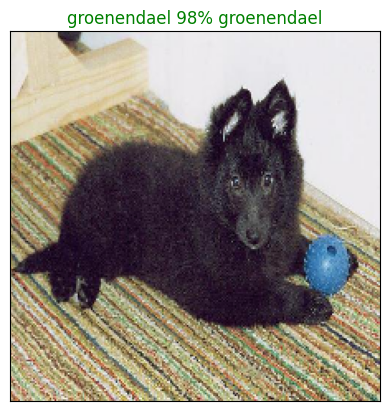

In [95]:
plot_pred(prediction_preobabilities=predictions,
          labels=val_labels,
          images=val_images,
          n = 77)

In [96]:
predictions[1], predictions.shape, len(predictions[1])

(array([3.13666905e-03, 3.70348548e-03, 5.34194447e-02, 3.86287970e-03,
        1.05664588e-03, 4.24565165e-04, 2.83765979e-02, 2.88950658e-04,
        1.95645774e-03, 1.82695687e-04, 3.77606507e-03, 1.02338934e-04,
        2.85178248e-04, 2.97978549e-04, 3.50152368e-05, 8.18918415e-05,
        3.88014968e-03, 3.16061749e-04, 4.00627294e-04, 1.35988070e-04,
        7.56817579e-04, 1.85380020e-04, 3.72424365e-05, 6.35170290e-05,
        1.21637866e-04, 8.24929666e-05, 3.68605331e-02, 5.28413942e-03,
        1.84988923e-04, 1.39833661e-04, 2.42788556e-05, 3.26750684e-04,
        2.51431193e-04, 1.25759716e-05, 8.47707444e-04, 3.42084968e-04,
        1.25494576e-03, 5.19077061e-03, 2.73517682e-04, 3.62623250e-05,
        1.07232227e-04, 1.65677498e-04, 1.58139723e-04, 7.19642034e-04,
        1.67219306e-03, 1.35816925e-03, 2.55950331e-03, 2.90362677e-05,
        1.29343644e-01, 6.78247088e-05, 2.94085010e-04, 8.10448983e-05,
        5.26039112e-05, 2.47869466e-04, 1.44508551e-04, 2.004067

 Now we've got one functions to visualize our models top prediction, let's make another to view our models top 10 prediction

 This function will:
 * Take an input of prediction probabilities array and a gound truth array and an integet
 * Find the top 10:
  * Prediciton probabilities indexes ✅
  * Prediction probabilities values ✅
  * Prediction labels ✅
* Plot the top 10 prediction probability values and labels, coloring the true label green ✅

In [97]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.3223799 , 0.10831233, 0.08917082, 0.06130623, 0.05467682,
       0.04971457, 0.04282461, 0.03783021, 0.03709348, 0.03017551],
      dtype=float32)

In [98]:
predictions[0].max()

0.3223799

In [99]:
unique_breeds[predictions[0].argsort()[-10:][::-1]]

array(['border_terrier', 'cairn', 'australian_terrier', 'irish_wolfhound',
       'soft-coated_wheaten_terrier', 'dandie_dinmont',
       'miniature_schnauzer', 'silky_terrier', 'lhasa', 'tibetan_terrier'],
      dtype=object)

In [100]:
def plot_pred_conf(prediction_probabilities, labels, n = 1):
  """
  Plus the top 10 highest prediction confidances along with the truth for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidences indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
                         labels = top_10_pred_labels,
                         rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

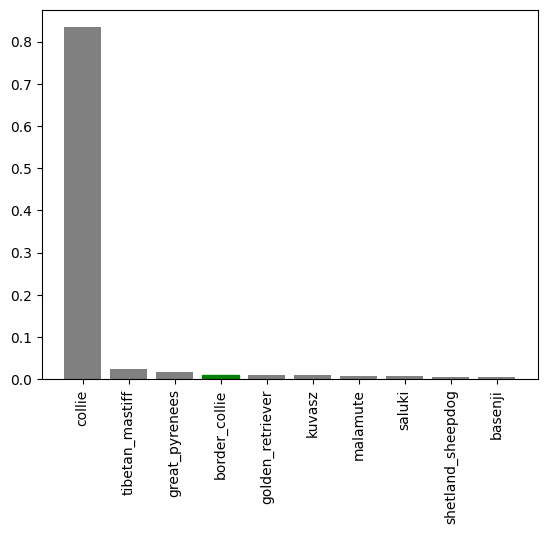

In [101]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some function to help is visualize our
predictions and evaluate our model, let's check out a few

In [102]:
predictions

array([[2.6559082e-03, 3.8333153e-04, 1.3244948e-03, ..., 5.0522829e-04,
        6.0802602e-05, 4.7424189e-03],
       [3.1366691e-03, 3.7034855e-03, 5.3419445e-02, ..., 1.0851184e-03,
        2.0025645e-03, 1.6886409e-04],
       [8.0201862e-06, 1.5804502e-05, 7.8955094e-07, ..., 6.1084953e-05,
        2.1097496e-05, 4.1747629e-05],
       ...,
       [5.6405902e-06, 8.1942324e-04, 1.3437321e-04, ..., 2.2542596e-05,
        1.0172927e-04, 9.3955622e-04],
       [2.2292749e-03, 4.7746362e-04, 4.8614533e-05, ..., 2.6921747e-04,
        2.0254791e-05, 3.4781666e-03],
       [6.7600427e-04, 4.7539030e-05, 3.4312048e-04, ..., 2.1686740e-03,
        6.0425670e-04, 8.1590988e-05]], dtype=float32)

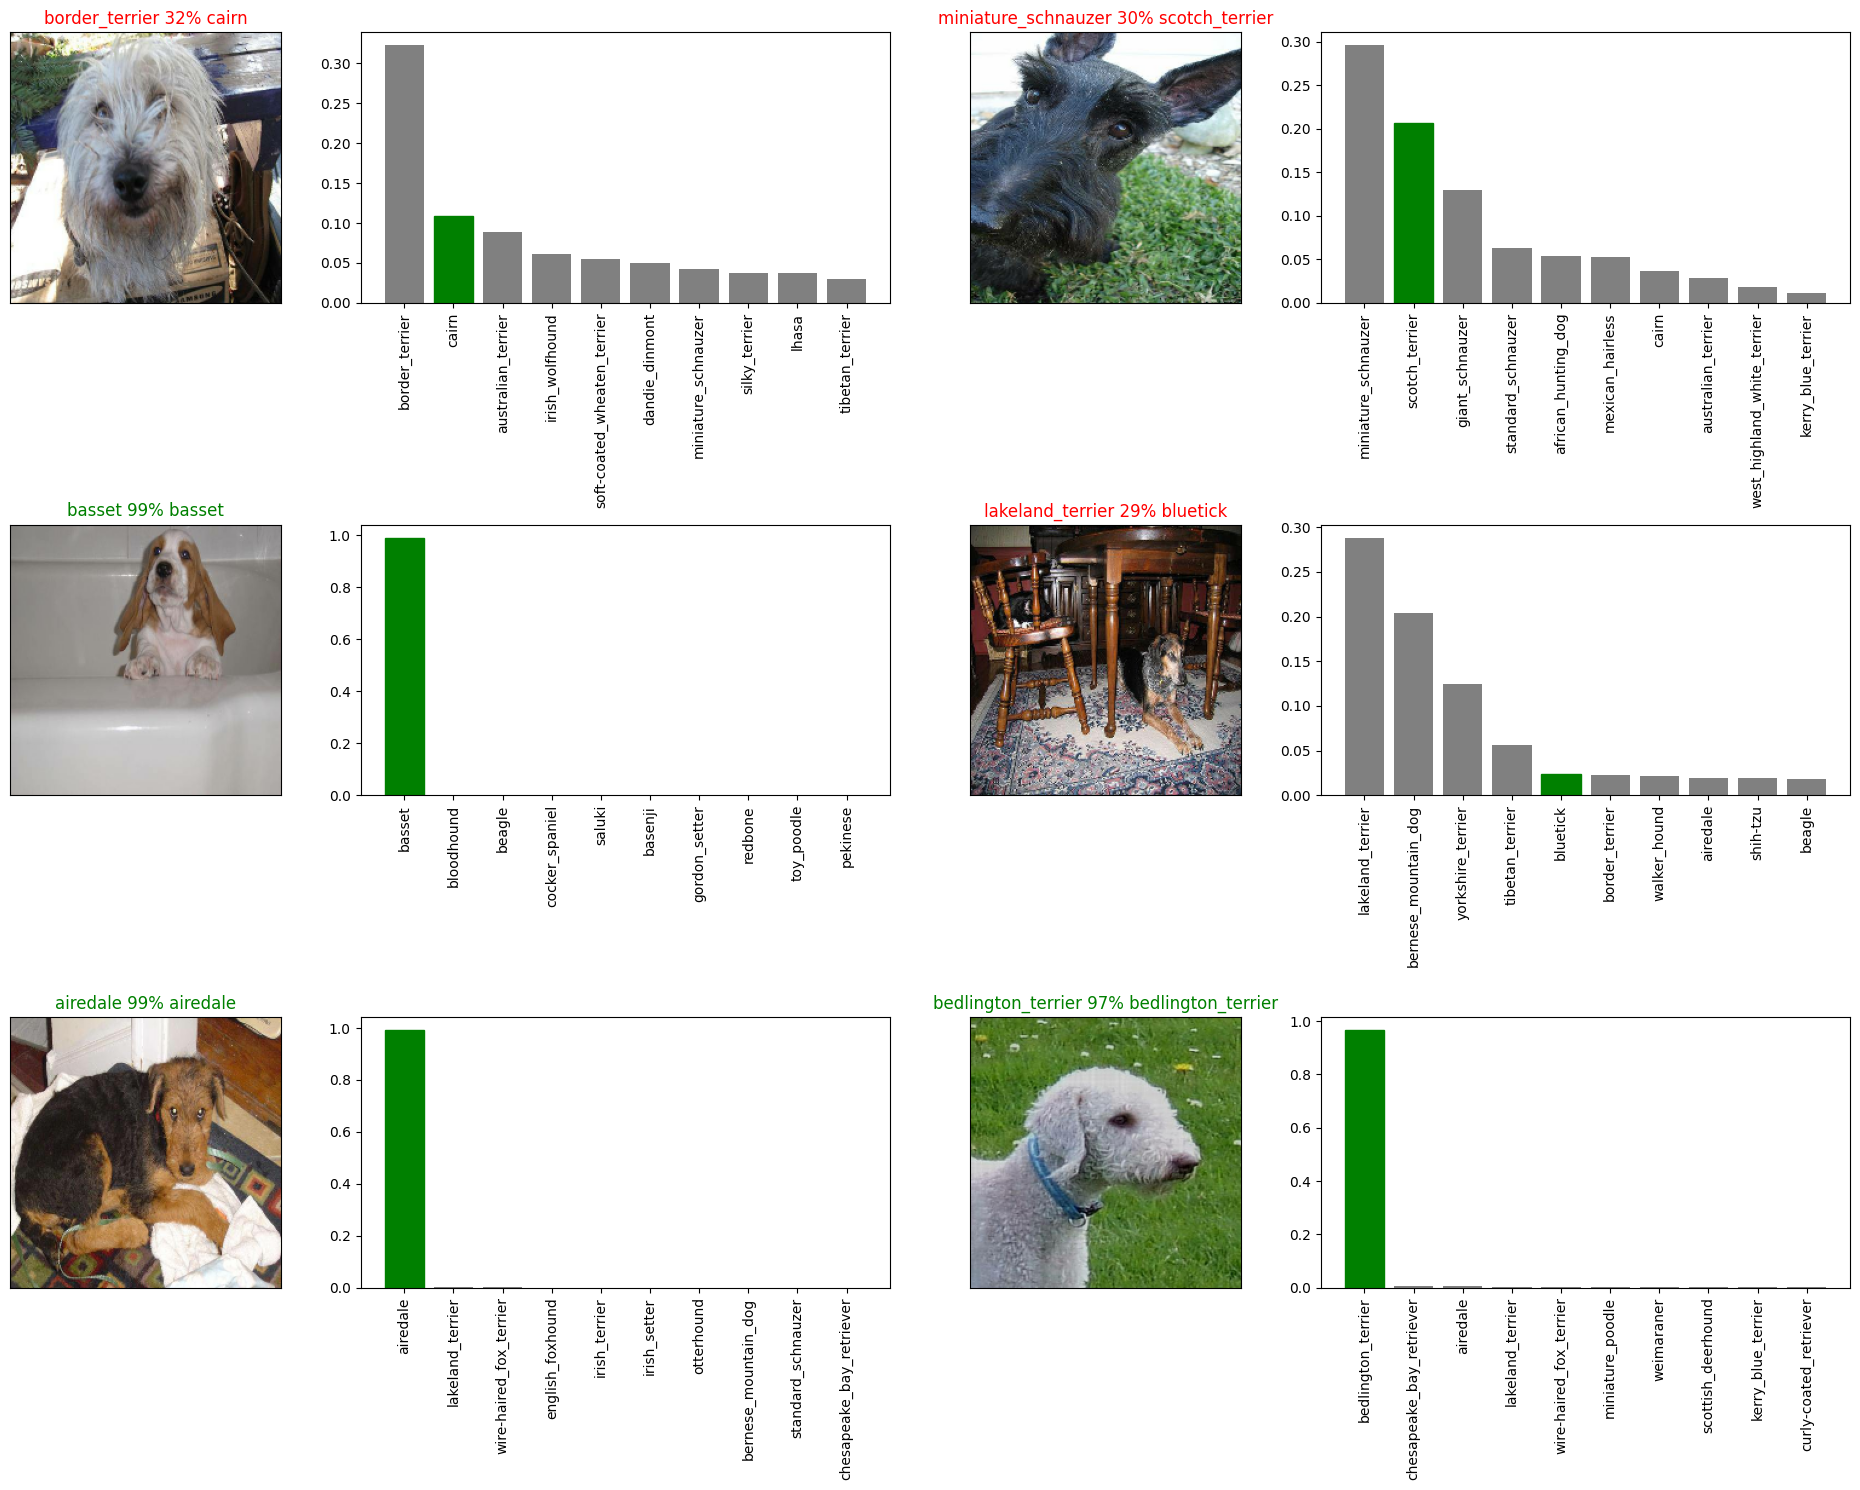

In [103]:
# Let's check out a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_preobabilities = predictions,
            labels = val_labels,
            images = val_images,
            n = i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels = val_labels,
                 n = i+i_multiplier)
  plt.tight_layout(h_pad=1.0)
plt.show()

### Creating confusion matrix  with our model preditions and true labels

## Saving and reloading a trained model

In [104]:
# Creating  a funcitons to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/Colab_Dog Vision data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # Save format of model
  print(f"Save model to: {model_path}.....")
  model.save(model_path)
  return model_path

In [105]:
# Create a funciton to load a trained modedl
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                    custom_objects = {"KerasLayer": hub.KerasLayer})
  return model

Checking if save and load functions

In [106]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Save model to: drive/My Drive/Colab_Dog Vision data/models/20240117-06381705473491-1000-images-mobilenetv2-Adam.h5.....


'drive/My Drive/Colab_Dog Vision data/models/20240117-06381705473491-1000-images-mobilenetv2-Adam.h5'

In [108]:
# Testing load model
loaded_1000_image_model = load_model("/kaggle/working/drive/My Drive/Colab_Dog Vision data/models/20240117-06381705473491-1000-images-mobilenetv2-Adam.h5")

Loading saved model from: /kaggle/working/drive/My Drive/Colab_Dog Vision data/models/20240117-06381705473491-1000-images-mobilenetv2-Adam.h5


In [109]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 0s 36ms/step - loss: 1.3663 - accuracy: 0.6350


[1.3662562370300293, 0.6349999904632568]

In [110]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 36ms/step - loss: 1.3663 - accuracy: 0.6350


[1.3662562370300293, 0.6349999904632568]

## Training a big dog model 🐕‍🦺 (on full data)

In [111]:
len(X), len(y)

(10222, 10222)

In [112]:
X[:10]

['/kaggle/input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/kaggle/input/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/kaggle/input/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/kaggle/input/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/kaggle/input/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/kaggle/input/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/kaggle/input/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/kaggle/input/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/kaggle/input/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/kaggle/input/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [113]:
len(X_train)

800

In [114]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches...


In [115]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [116]:
# Create a model for full model
full_model = create_model()

Buuilding model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [117]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when when training on all data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy",
                                                             patience=3)

**Note:** Running the cell below will take some time(mabe up to 30 minutes) 

In [120]:
# Fit the full model to the full data
full_model.fit(x = full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/50
320/320 [==============================] - 30s 80ms/step - loss: 1.3584 - accuracy: 0.6661
Epoch 2/50
320/320 [==============================] - 11s 33ms/step - loss: 0.4015 - accuracy: 0.8823
Epoch 3/50
320/320 [==============================] - 11s 34ms/step - loss: 0.2391 - accuracy: 0.9330
Epoch 4/50
320/320 [==============================] - 11s 33ms/step - loss: 0.1520 - accuracy: 0.9633
Epoch 5/50
320/320 [==============================] - 11s 33ms/step - loss: 0.1077 - accuracy: 0.9771
Epoch 6/50
320/320 [==============================] - 11s 34ms/step - loss: 0.0780 - accuracy: 0.9853
Epoch 7/50
320/320 [==============================] - 11s 34ms/step - loss: 0.0594 - accuracy: 0.9919
Epoch 8/50
320/320 [==============================] - 11s 33ms/step - loss: 0.0457 - accuracy: 0.9942
Epoch 9/50
320/320 [==============================] - 11s 34ms/step - loss: 0.0378 - accuracy: 0.9959
Epoch 10/50
320/320 [==============================] - 11s 34ms/step - loss: 0.030

In [119]:
# save_model(full_model, suffix="full_image-set-mobilentv2-Adam")

In [ ]:
# Load full model
# full_model_loaded = load_model("drive/My Drive/Colab_Dog Vision data/models/20221110-13051668085517-full_image-set-mobilentv2-Adam.h5")

In [125]:
full_model_loaded = full_model

## Making the prediction on test dataset

Since our model has been trained on images in the form  of Tensor batches, to make prediction on the test data, we'll have to get it into the same format.

Use `create_data_batches()` To convert list of filenames as input and convert them into Tensorfloww batches.

To make predictions on the test data we'll:
* Get the test image filenames.✅
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels).✅
* Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [126]:
# Load test image filename
test_path = "/kaggle/input/dog-breed-identification/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/kaggle/input/dog-breed-identification/test/09e51e17e2b756ff2ace8a87bd1443fa.jpg',
 '/kaggle/input/dog-breed-identification/test/f7a32505c12649183c5991ecfa7d68b3.jpg',
 '/kaggle/input/dog-breed-identification/test/bc6d50ffb4644feb34530aa58943e85b.jpg',
 '/kaggle/input/dog-breed-identification/test/7cbc041e79135a572aad87904b5c9c57.jpg',
 '/kaggle/input/dog-breed-identification/test/f3b603f10d6a344f0395fb46b242ff8e.jpg',
 '/kaggle/input/dog-breed-identification/test/db55098d859d27a3c05b0e3fc41d43e7.jpg',
 '/kaggle/input/dog-breed-identification/test/665bab06a3ea861c0812c778486988e3.jpg',
 '/kaggle/input/dog-breed-identification/test/7b57911ea7559cebd6db308125926642.jpg',
 '/kaggle/input/dog-breed-identification/test/df0d6ba158287cb2b3ed6459a22d42ba.jpg',
 '/kaggle/input/dog-breed-identification/test/b80d89ad4a17ac2537ff46d251efcd7c.jpg']

In [127]:
len(test_filenames)

10357

In [128]:
# Create test data batch 
test_data = create_data_batches(test_filenames, test_data = True)

Creating test data batches...


In [129]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [130]:
# Make prediction on test data batch using the loaded full model
test_predictions = full_model_loaded.predict(test_data, verbose = 1 )

324/324 [==============================] - 29s 89ms/step


In [131]:
# Save predictions (Numpy arrary) to csv file (for access later)
np.savetxt("/kaggle/working/drive/preds_array.csv", test_predictions, delimiter=",")

In [132]:
# Load predictions (Numpy array) from csv file 
test_predictions = np.loadtxt("/kaggle/working/drive/preds_array.csv", delimiter=",")

In [133]:
test_predictions[:10]

array([[8.32202307e-10, 4.74981556e-12, 1.99027417e-09, ...,
        1.14336317e-05, 1.94210976e-08, 1.19436718e-08],
       [1.98343078e-13, 7.42281459e-10, 5.61897208e-13, ...,
        2.44230614e-09, 8.40780657e-12, 4.79636296e-13],
       [8.97433183e-10, 1.96397486e-05, 4.56723832e-08, ...,
        2.67694347e-08, 1.68792202e-11, 1.29704691e-10],
       ...,
       [3.34492150e-08, 5.26105595e-08, 2.77917661e-10, ...,
        3.29713229e-10, 5.52956444e-13, 1.21984606e-12],
       [5.06327124e-05, 1.83932286e-07, 1.30169610e-06, ...,
        1.57983550e-07, 1.00151037e-05, 2.84013709e-07],
       [4.69254591e-09, 7.50154250e-09, 6.08101736e-10, ...,
        6.71629863e-10, 6.14213347e-10, 4.42243520e-10]])

In [134]:
test_predictions.shape

(10357, 120)

In [135]:
len(test_predictions), test_predictions.size

(10357, 1242840)

## Preparing test dataset predictions for Kaggle

Looking at the Kaggle sample submission, we find it wants our models prediction probability output in a DataFrame with an ID and a column for each different dog breed

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

TO get the data int this format, we'll:
* Create a pandas  DataFrame wih an ID column as well as a column for each dog breed
* Add data to the ID coluumn by extreacting the test image ID's from their filepaths
* Add data (the prediction probabilities) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to kaggle

In [136]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [140]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids[:5]

['09e51e17e2b756ff2ace8a87bd1443fa',
 'f7a32505c12649183c5991ecfa7d68b3',
 'bc6d50ffb4644feb34530aa58943e85b',
 '7cbc041e79135a572aad87904b5c9c57',
 'f3b603f10d6a344f0395fb46b242ff8e']

In [141]:
os.path.splitext(test_filenames[0])

('/kaggle/input/dog-breed-identification/test/09e51e17e2b756ff2ace8a87bd1443fa',
 '.jpg')

In [142]:
preds_df["id"] = test_ids

In [143]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,09e51e17e2b756ff2ace8a87bd1443fa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f7a32505c12649183c5991ecfa7d68b3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bc6d50ffb4644feb34530aa58943e85b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7cbc041e79135a572aad87904b5c9c57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f3b603f10d6a344f0395fb46b242ff8e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
# Add the prediction probability to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,09e51e17e2b756ff2ace8a87bd1443fa,8.322023e-10,4.749816e-12,1.990274e-09,1.069246e-08,2.430183e-01,1.143733e-10,2.869781e-08,1.663960e-06,2.375484e-10,...,2.840229e-08,2.848612e-07,3.910661e-09,2.217845e-08,4.424784e-11,3.034338e-12,1.068935e-07,1.143363e-05,1.942110e-08,1.194367e-08
1,f7a32505c12649183c5991ecfa7d68b3,1.983431e-13,7.422815e-10,5.618972e-13,4.431924e-11,5.679547e-10,4.262279e-10,3.425351e-08,2.933799e-09,1.276659e-08,...,6.585971e-12,7.589941e-12,4.047772e-06,1.161120e-07,5.624039e-11,3.322035e-12,7.887601e-14,2.442306e-09,8.407807e-12,4.796363e-13
2,bc6d50ffb4644feb34530aa58943e85b,8.974332e-10,1.963975e-05,4.567238e-08,5.351529e-07,2.633873e-08,2.148769e-09,2.714759e-10,1.239310e-09,1.685939e-08,...,6.973691e-10,1.110282e-11,5.990401e-12,1.592320e-08,6.012987e-08,6.698763e-09,7.572359e-12,2.676943e-08,1.687922e-11,1.297047e-10
3,7cbc041e79135a572aad87904b5c9c57,4.109316e-10,4.701260e-12,1.136700e-13,7.351600e-10,3.451820e-07,6.431745e-07,1.617171e-09,3.342910e-10,1.636209e-12,...,7.860773e-10,6.691669e-09,1.912111e-10,8.474892e-12,1.158645e-04,1.277067e-12,6.663384e-12,7.063098e-06,7.810542e-10,1.133267e-09
4,f3b603f10d6a344f0395fb46b242ff8e,7.895835e-13,1.657693e-11,1.785960e-12,2.414505e-09,2.877471e-12,2.137950e-09,2.390866e-10,3.073517e-11,3.308708e-09,...,2.063748e-12,2.088152e-11,1.726434e-10,6.558931e-11,3.459364e-13,9.999644e-01,1.857956e-11,9.045025e-13,5.044044e-12,7.648853e-12


In [146]:
preds_df.to_csv("/kaggle/working/drive/My Drive/Colab_Dog Vision data/full_model_submission_1_mobilenetv2.csv",
                index = False)